# EE5357 Introduction to Image Processing

# Assignment-3

Images used in the assignment are from the database http://sipi.usc.edu/database/database.php?volume=misc&image=17#top.
Matplotlib module is used in the assignment to read and display images.


In [2]:
%matplotlib inline

## Imports

In [3]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Images Used:

[[150 144 155 ... 189 188 161]
 [189 183 185 ... 185 185 121]
 [191 184 183 ... 189 183 113]
 ...
 [178 180 180 ... 188 185 179]
 [182 178 174 ... 207 206 207]
 [197 192 189 ... 142 155 159]]


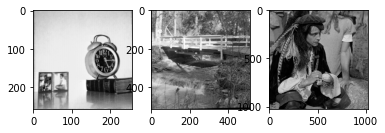

In [4]:
I1 = mpimg.imread('5.1.12.tiff')
I2 = mpimg.imread('5.2.10.tiff')
I3 = mpimg.imread('5.3.01.tiff')

f = plt.figure()
f.add_subplot(1,3,1)
plt.imshow(I1,cmap=plt.get_cmap('gray'))
f.add_subplot(1,3,2)
plt.imshow(I2,cmap=plt.get_cmap('gray'))
f.add_subplot(1,3,3)
plt.imshow(I3,cmap=plt.get_cmap('gray'))

I_mat = [I1,I2,I3]

# 1: 2D-DFT

### Using the smallest image...(since first principles method is slow)

(256, 256)

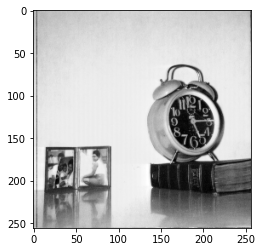

In [252]:
I_small = I1 #[400:600,200:400]
plt.imshow(I_small,cmap=plt.get_cmap('gray'))
Ms,Ns = np.shape(I_small)
np.shape(I_small)

## First Principles

<div class="alert alert-info"><h3>Note:-</h3><p>Instead of using for loops for summation, I have used matrix multiplication for summation in order to decrease time complexity... but essentially, it is by the means of first principles formula...

In [245]:
I_s_dft = np.zeros((Ms,Ns),dtype=complex)

for u in range(Ns):
    W_Ns = np.exp((-2*np.pi*u*1j/Ns)*np.linspace(0,Ns-1,num=Ns)).reshape(-1,1)
    for v in range(Ms):
        W_Ms = np.exp((-2*np.pi*v*1j/Ms)*np.linspace(0,Ms-1,num=Ms)).reshape(1,-1)
        I_s_dft[u,v] = np.matmul(W_Ms,np.matmul(I_small,W_Ns)) 
        
#print(I_s_dft)
print(np.shape(I_s_dft))

(256, 256)


In [246]:
I_s_rec = np.zeros((Ms,Ns),dtype=complex)

for u in range(Ns):
    W_Ns = np.exp((2*np.pi*u*1j/Ns)*np.linspace(0,Ns-1,num=Ns)).reshape(-1,1)
    for v in range(Ms):
        W_Ms = np.exp((2*np.pi*v*1j/Ms)*np.linspace(0,Ms-1,num=Ms)).reshape(1,-1)
        I_s_rec[u,v] = np.matmul(W_Ms,np.matmul(I_s_dft,W_Ns))/(Ms*Ns)
        
#print(I_s_rec)
print(np.shape(I_s_rec))

(256, 256)


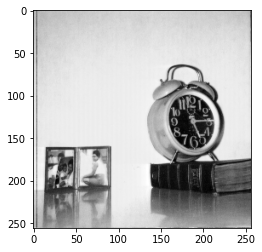

In [247]:
plt.imshow(np.round(np.abs(I_s_rec)),cmap=plt.get_cmap('gray'))

In [248]:
#Comparison
np.array_equal(I_small,np.round(np.abs(I_s_rec)))

True

## Matrix Multiplication Method

In [253]:
def dft_mat(I):
    N = np.shape(I)[0]
    W_mat = np.zeros((N,N),dtype=complex) #N=M=1024
    Wn = np.exp(-1j*2*np.pi/N)
    for u in range(N):
        for v in range(N):
            W_mat[u,v] = Wn**((u)*(v))
    return np.matmul(W_mat,np.matmul(I,W_mat)) 
        
I1_dft = dft_mat(I1)
#print(I_dft)

In [257]:
def idft_mat(I_dft):
    N = np.shape(I_dft)[0]
    W_matconj = np.zeros((N,N),dtype=complex) #N=M=1024
    Wn_inv = np.exp(1j*2*np.pi/N)
    for u in range(N):
        for v in range(N):
            W_matconj[u,v] = Wn_inv**((u)*(v))
    return np.divide(np.matmul(W_matconj,np.matmul(I_dft,W_matconj)),N*N) 
        
I1_rec = idft_mat(I1_dft)
#print(I_rec)

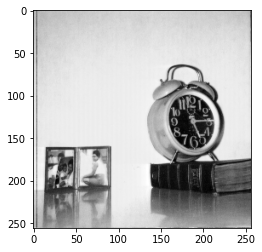

In [258]:
plt.imshow(np.round(np.abs(I1_rec)),cmap=plt.get_cmap('gray'))

In [259]:
#Comparison
np.array_equal(I1,np.round(np.abs(I1_rec)))

True

## Magnitude, Phase and Log compression of DFT

### Magnitude Display

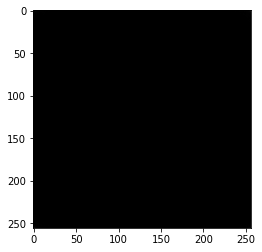

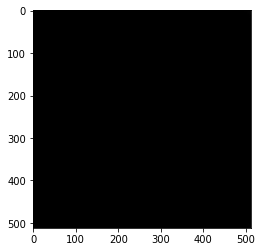

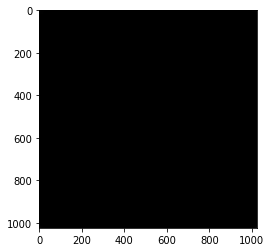

In [262]:
for img in I_mat:
    dft_mag = np.abs(dft_mat(img))
    plt.imshow(dft_mag,cmap=plt.get_cmap('gray'))
    plt.show()

### Phase Display

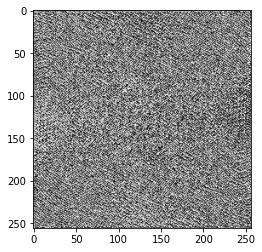

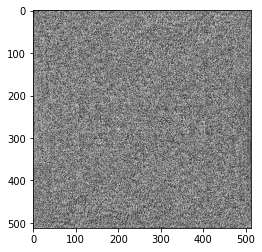

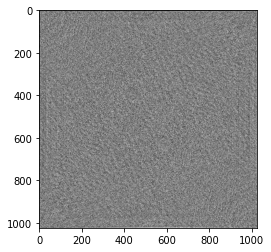

In [263]:
for img in I_mat:
    dft_ph = np.angle(dft_mat(img))
    plt.imshow(dft_ph,cmap=plt.get_cmap('gray'))
    plt.show()

### FSCS & LOG Compression

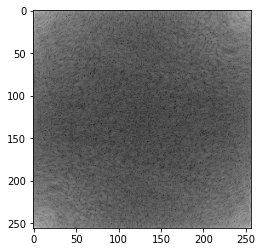

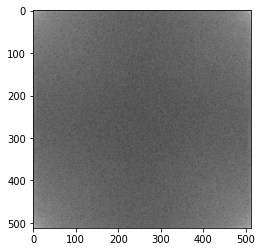

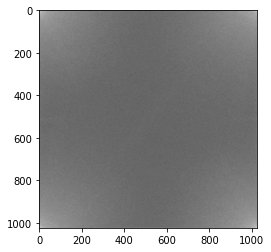

In [264]:
for img in I_mat:
    dft_mag = np.abs(dft_mat(img))
    dft_log = np.log2(1+dft_mag)
    K = 256
    A = np.amin(img)
    B = np.amax(img)
    P = (K-1)/(B-A)
    L = A*(1-K)/(B-A)
    dft_fscs = P*dft_log+L
    plt.imshow(dft_fscs,cmap=plt.get_cmap('gray'))
    plt.show()


## Centred DFT

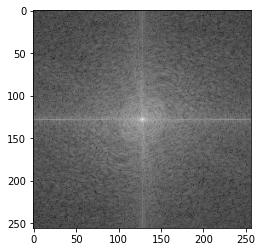

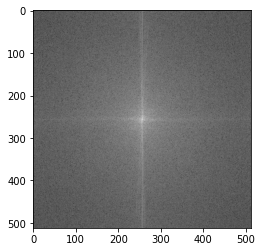

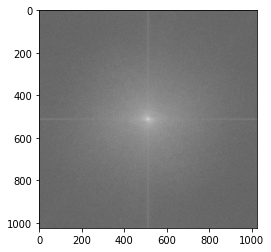

In [265]:
def centered_dft(I):
    N = np.shape(I)[0]
    I_temp = np.zeros(np.shape(I))
    W_mat = np.zeros((N,N),dtype=complex) #N=M=1024
    Wn = np.exp(-1j*2*np.pi/N)
    for u in range(N):
        for v in range(N):
            I_temp[u,v] = I[u,v]*((-1)**(u+v))
            W_mat[u,v] = Wn**((u)*(v))
    return np.matmul(W_mat,np.matmul(I_temp,W_mat)) 
        
for img in I_mat:
    dft_mag = np.abs(centered_dft(img))
    dft_log = np.log2(1+dft_mag)
    K = 256
    A = np.amin(img)
    B = np.amax(img)
    P = (K-1)/(B-A)
    L = A*(1-K)/(B-A)
    dft_fscs = P*dft_log+L
    plt.imshow(dft_fscs,cmap=plt.get_cmap('gray'))
    plt.show()

## DFT & IDFT verification

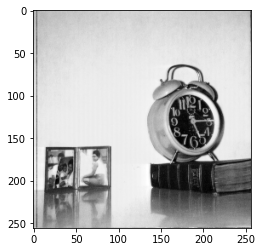

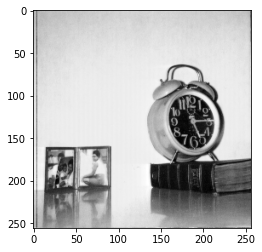

True


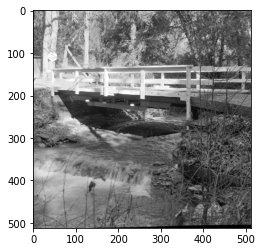

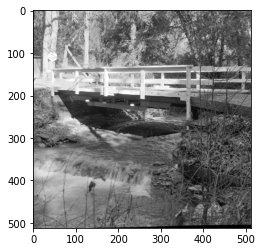

True


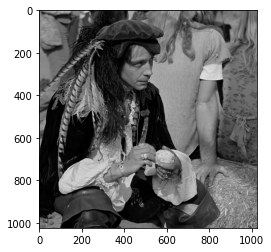

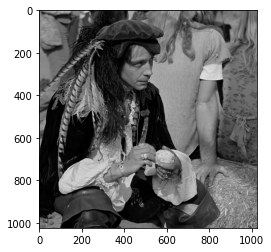

True


In [267]:
for img in I_mat:
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()
    img_rec = idft_mat(dft_mat(img))
    plt.imshow(np.round(np.abs(img_rec)),cmap=plt.get_cmap('gray'))
    plt.show()
    print(np.array_equal(img,np.round(np.abs(img_rec))))
    

## Phase Manipulations

### Transposing the Phase Matrix

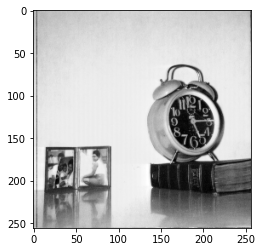

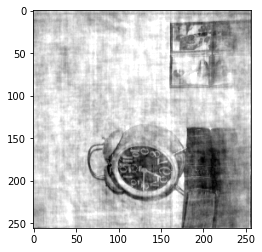

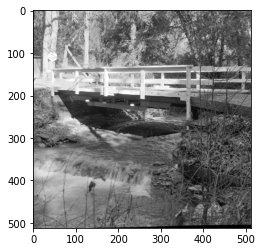

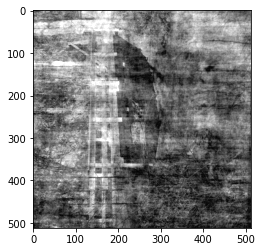

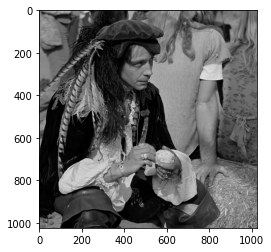

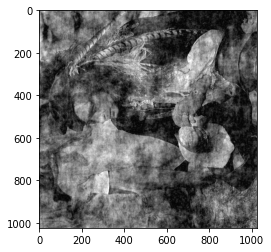

In [332]:
for img in I_mat:
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()
    dft_ph = np.angle(dft_mat(img))
    dft_ph_T = np.transpose(dft_ph) #transpose
    dft_new = np.multiply(np.abs(dft_mat(img)),np.exp(1j*dft_ph_T)) #dft after phase transpose
    img_new = np.round(np.abs(idft_mat(dft_new))) # resulting image
    plt.imshow(img_new,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
    plt.show()

### Setting Phase to zero

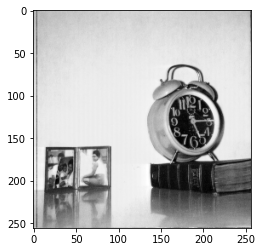

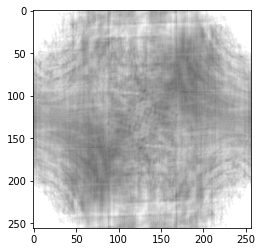

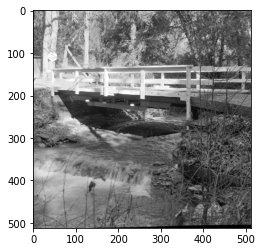

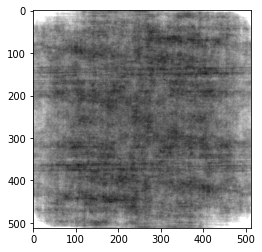

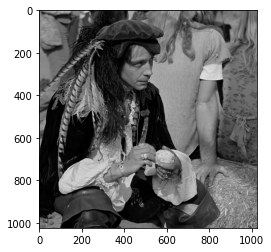

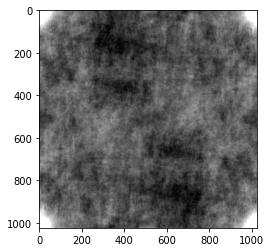

In [333]:
for img in I_mat:
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()
    dft_new = np.multiply(np.abs(dft_mat(img)),np.ones(np.shape(img))) #zero phase means exp(0) which is equal to unity
    img_new = np.round(np.abs(idft_mat(dft_new))) # resulting image
    plt.imshow(img_new,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
    plt.show()

### Adding Gaussian noise

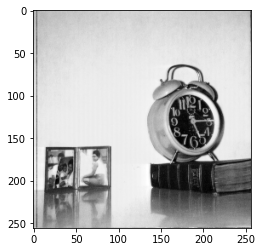

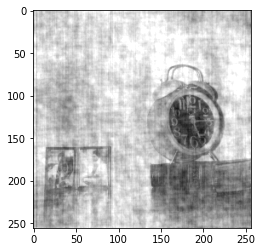

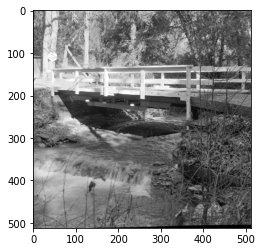

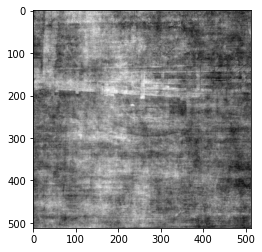

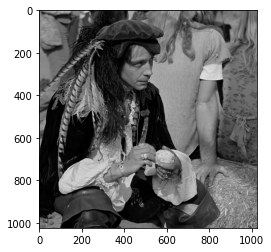

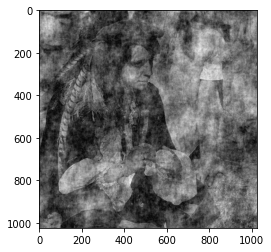

In [334]:
for img in I_mat:
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()
    dft_ph = np.angle(dft_mat(img))
    mu,sigma = 0,1 #typical values
    noisyph = dft_ph+np.random.normal(mu,sigma , size=np.shape(img))
    dft_new = np.multiply(np.abs(dft_mat(img)),np.exp(1j*noisyph)) #dft after noise phase
    img_new = np.round(np.abs(idft_mat(dft_new))) # resulting image
    plt.imshow(img_new,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
    plt.show()

# 2: Periodic Convolution

## Circular Convolution

In [335]:
def imgconv(img,kernel):
    M,N = np.shape(img)
    Mk,Nk = np.shape(kernel)
    result = np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            for p in range(Mk):
                for q in range(Nk):
                    result[i,j] += img[(i-p)%N][(j-q)%M]*kernel[p][q]
    return result
                                 

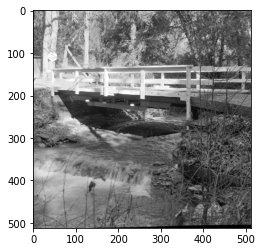

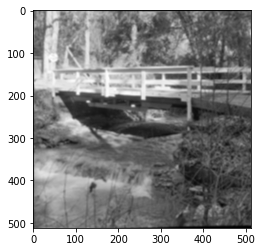

In [336]:
plt.imshow(I2,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()
avgkern = np.ones((5,5))/25
product_circ = imgconv(I2,avgkern)
plt.imshow(product_circ,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()

## Linear Convolution

In [337]:
def imglinconv(img,kernel):
    M,N = np.shape(img)
    Mk,Nk = np.shape(kernel)
    #padding
    imgpadded = np.zeros((2*Mk+M-2,2*Nk+N-2)) 
    imgpadded[Mk-1:Mk+M-1,Nk-1:Nk+N-1] = img
    result = imgconv(imgpadded,kernel)
    result = result[Mk-1:,Nk-1:]
    return np.round(result)
    

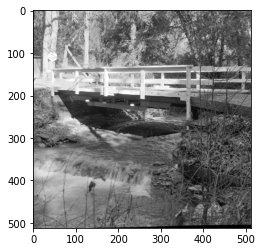

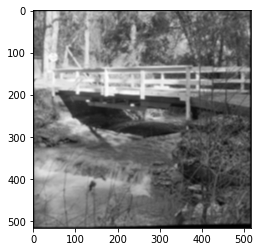

In [338]:
plt.imshow(I2,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()
avgkern = np.ones((5,5))/25
product_lin = imglinconv(I2,avgkern)
plt.imshow(product_lin,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()

## Linear convolution using DFT matrices

In [339]:
def imglinconv2(img,kernel):
    M,N = np.shape(img)
    Mk,Nk = np.shape(kernel)
    #padding image
    imgpadded = np.zeros((Mk+M-1,Nk+N-1)) 
    imgpadded[:M,:N] = img
    #padding kernel
    kernelpadded = np.zeros((Mk+M-1,Nk+N-1)) 
    kernelpadded[:Mk,:Nk] = kernel
    # dft multiplication
    kernel_dft = dft_mat(kernelpadded)
    img_dft = dft_mat(imgpadded)
    result_dft = np.multiply(kernel_dft,img_dft)
    result = idft_mat(result_dft)
    return np.round(np.abs(result))
    

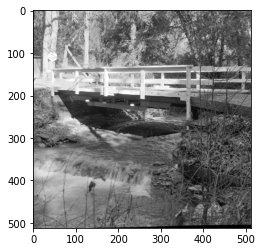

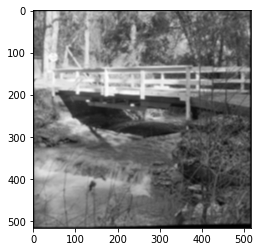

In [340]:
plt.imshow(I2,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()
avgkern = np.ones((5,5))/25
product_lin2 = imglinconv2(I2,avgkern)
plt.imshow(product_lin2,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()

In [341]:
#Comparison
np.array_equal(product_lin,product_lin2)

True

# 3: Image Denoising using Linear Filters

## Average Filter

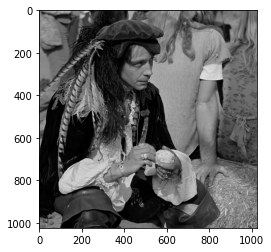

In [314]:
plt.imshow(I3,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()

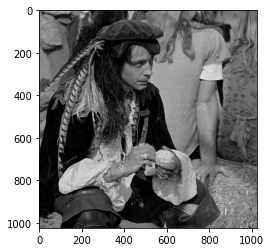

In [322]:
# Adding noise to the image
mu,sigma = 0,5
I3_noisy = I3 + np.random.normal(mu,sigma,size=np.shape(I3))
plt.imshow(I3_noisy,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.show()

In [323]:
def avgfilter(img,side): #length of a side of average filter
    M,N = np.shape(img)
    filtered = img.copy()
    offset = int((side-1)/2)
    kernel = np.divide(np.ones((side,side)),side*side)
    for i in range(offset,M-offset):
        for j in range(offset,N-offset):
            filtered[i,j] = np.sum(np.multiply(kernel,img[i-offset:i+offset+1,j-offset:j+offset+1]))
    return np.round(filtered)
                   

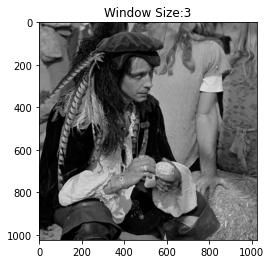

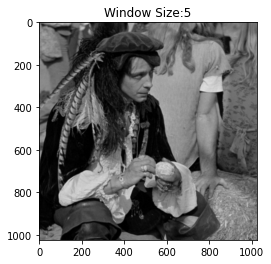

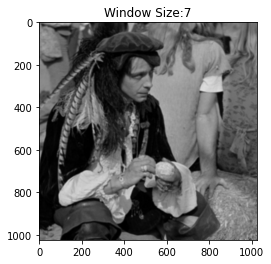

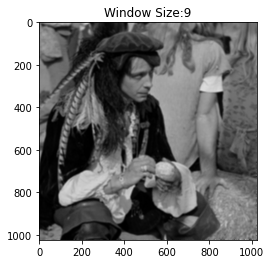

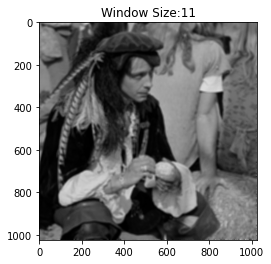

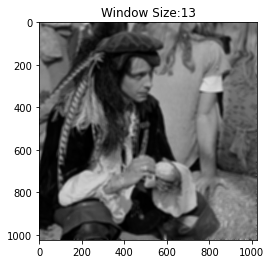

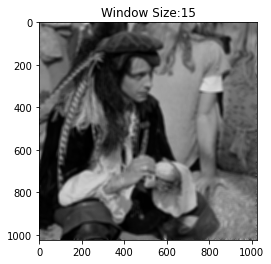

In [331]:
Mset = np.arange(3,17,2)

for k in range(len(Mset)):
    I3rec = avgfilter(I3_noisy,Mset[k])
    plt.title("Window Size:"+str(Mset[k]))
    plt.imshow(I3rec,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
    plt.show()


<div class="alert alert-info"><h3>Observations:-</h3><p> 
  -> Denoising :- As we increase the size of the kernel(filter), the noise in the image decreases and this is because we are considering the average of all the neighboring pixels.</p><p>
   -> Smoothening :- As we increase the size of the kernel, the image is more smoothened.
    </p>
    <p> -> Blurring :- with increase in size of the kernel, the image is getting more blurred. </p><p> 
    Conclusion:- Though the image gets blurred with increase in value of k, there exists a tradeoff between noise   smootheness.This implies with kernel size 15, denoising and smoothening reaches at peak while sharpness is highly decreased.With kernel size 3 denoising and smoothening effects are minimised while image is almost as sharp as the original image.</p><p> 
The appropriate filter would be of size 3 since the gaussian noise variance is low and higher size results into blurring... </p></div>

## Gaussian Filter

In [329]:
def gaussianfilter(img,sigma):
    M,N = np.shape(img)
    side=5
    gaussian_dft = np.zeros((5,5))
    for u in range(5):
        for v in range(5):
            gaussian_dft[u,v] = np.exp(-2*((np.pi*sigma)**2)*(u**2+v**2)/(5**2))
    filtered = img.copy()
    offset = int((side-1)/2)
    kernel = np.abs(idft_mat(gaussian_dft))
    for i in range(offset,M-offset):
        for j in range(offset,N-offset):
            filtered[i,j] = np.sum(np.multiply(kernel,img[i-offset:i+offset+1,j-offset:j+offset+1]))
    return filtered



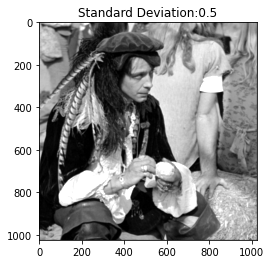

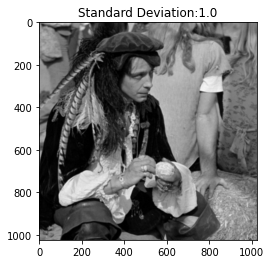

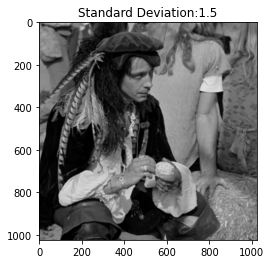

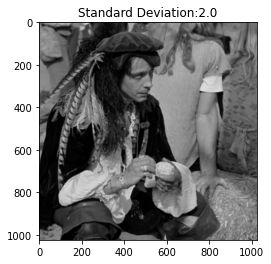

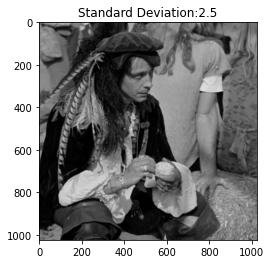

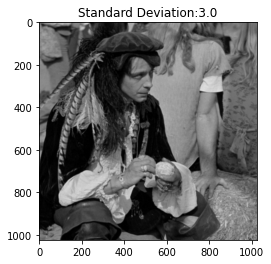

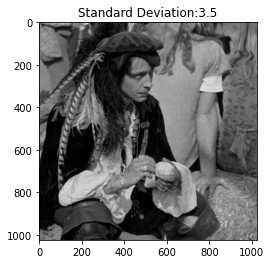

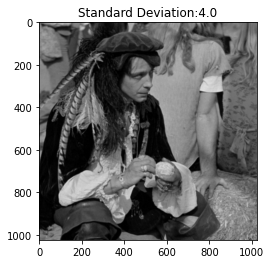

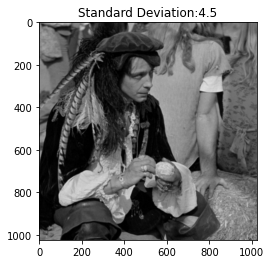

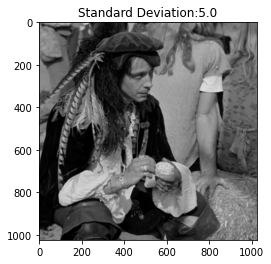

In [330]:
sigma_set = np.arange(0.5,5.5,0.5)

for k in range(len(sigma_set)):
    I3filt = gaussianfilter(I3_noisy,sigma_set[k])
    plt.title("Standard Deviation:"+str(sigma_set[k]))
    plt.imshow(I3filt,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
    plt.show()


FACTS:

- The Gaussian filter is a non-uniform low pass filter.

- The kernel coefficients diminish with increasing distance from the kernel’s centre.

- Central pixels have a higher weight than those on the periphery.
The filtering affect depends on the standard deviation of the gaussian filter.
<div class="alert alert-info"><h3>Observations:-</h3><p> 
   Effect on Denoising :- As we increase the value of σ, the noise in the image decreases.</p><p>
   
    Conclusion:- Larger values of σ produce a wider peak (greater blurring). The results in increase in blur with increase in σ but at a very slow rate, this is because the gaussian peak has more weight on the center pixel, where as the average filter has equal weights to all the pixels.  </p></div>